In [1]:
# Cargamos las librerias a implementar (We load the libraries to be implemented)
import pandas as pd
import operator as op
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar archivo csv con los datos de la tienda online (Upload csv file with online store data)
ret_df = pd.read_csv('online_retail.csv', parse_dates=['InvoiceDate'])
ret_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Data Dictionary 
* InvoiceNo	A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation.
* StockCode	A 5-digit integral number uniquely assigned to each distinct product.
* Description	Product (item) name
* Quantity	The quantities of each product (item) per transaction
* InvoiceDate	The day and time when each transaction was generated
* UnitPrice	Product price per unit in sterling (pound)
* CustomerID	A 5-digit integral number uniquely assigned to each customer
* Country	The name of the country where each customer resides

In [3]:
# Transformamos el tipo de objeto de cada columna y creamos la columna de total por item (Cantidad x Precio Unitario)
# transform the object type of each column and create the total per item column (Quantity x Unit Price).
ret_df= ret_df.convert_dtypes()
ret_df['Total'] = ret_df['Quantity']*ret_df['UnitPrice'] 
ret_df.dtypes

InvoiceNo              string
StockCode              string
Description            string
Quantity                Int64
InvoiceDate    datetime64[ns]
UnitPrice             Float64
CustomerID              Int64
Country                string
Total                 Float64
dtype: object

## Analisis Exploratorio de los Datos (Exploratory Data Analysis)

In [4]:
ret_df.describe()

,Quantity,UnitPrice,CustomerID,Total
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


* Existen valores negativos con cifras fuera de lo comun en las columnas de Cantidades, Precio Unitario.
* Descartaremos aquellos item que tengan un valor en la columna 'Total' menor o igual a 0. Esto se debe a que las cantidades negativas son devoluciones, ajustes por deterioro de mercancia o ordenes canceladas.
* There are negative values with figures out of the ordinary in the quantities, unit price columns, etc. 
* We will discard items with a value in the 'Total' column less than or equal to 0. This is because the negatives are returns, adjustments for deterioration of merchandise, or cancel orders.

In [5]:
## Descartar valores que tengan un valor Total negativo (Discard items with a value in the 'Total' column less than or equal to 0)
c_ret_df = ret_df.copy()
valores_nulos = c_ret_df[c_ret_df['Total'] <= 0].index
c_ret_df = c_ret_df.drop(valores_nulos, axis=0)
c_ret_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6


## A este punto El dataframe no contiene los datos con totales negativos
## At this point the dataframe does not contain data with negative totals.

In [6]:
c_ret_df.describe()

,Quantity,UnitPrice,CustomerID,Total
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


### Valores Faltantes (Missing Values)

In [7]:
# Datos faltantes al DataFrame
c_ret_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
Total               0
dtype: int64

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


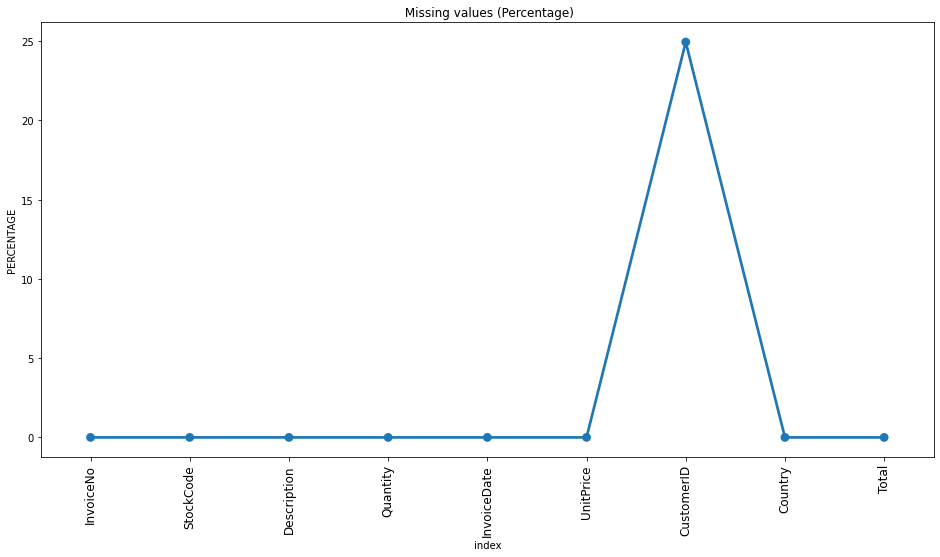

In [8]:
missing = pd.DataFrame((c_ret_df.isnull().sum())*100/c_ret_df.shape[0]).reset_index()
plt.figure(figsize=(16,8))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =12)
plt.title(" Missing values (Percentage)")
plt.ylabel("PERCENTAGE")
plt.savefig('percentajemissingvalues.jpg', \
            format='jpg', bbox_inches='tight')
plt.show()


In [9]:
missing

,index,0
0,InvoiceNo,0.000000
1,StockCode,0.000000
2,Description,0.000000
3,Quantity,0.000000
4,InvoiceDate,0.000000
5,UnitPrice,0.000000
6,CustomerID,24.942275
7,Country,0.000000
8,Total,0.000000


* El 25% de los datos de codigo de cliente (CustomerID) se encuentran en blanco. Evaluemos el impacto que tiene en comparación con la totalización de las variables numericas, no queremos que el analisis que se cosntruya a partir de los datos se encuentre incompleto debido a que se hayan emitidos ordenes de ventas sin un cliente asociado. 
* 25% of the CustomerID data is empty. Let's evaluate the impact this has compared to the totalization of the numerical variables, we do not want the analysis built from the data to be incomplete due to sales orders being issued without an associated customer.

In [10]:
# totalize numerical columns from entries without CustomerID
null_valuesID = c_ret_df[c_ret_df['CustomerID'].isnull()]
total_null = null_valuesID.sum().to_frame()
total_null.style.format('{:.2f}')

,0
Quantity,420564.00
UnitPrice,831447.16
CustomerID,0.00
Total,1755276.64


In [11]:
# totalize numerical columns from  the entire dataframe and compare the weight of the null_valuesID in the Total column 
total_null.divide(c_ret_df.sum().to_frame())

,0
Quantity,0.075257
UnitPrice,0.401385
CustomerID,0.000000
Total,0.164557


* 1.755.276 £ pertenecen a artículos sin ID de cliente, esta cantidad representa casi el 17% del total de todo el dataframe 
* El peso en el total de ventas de los null_valuesID es considerable.
* Hay que evaluar si se pueden rellenar los valores que faltan o si se decide continuar sin esas filas.


* 1.755.276 £ belong to items without Customer ID, this amount represent almost 17% of the total from the entire dataframe 
* The weight in the total sale from the null_valuesID is considerable
* Have to evaluate if could fill the missing values or if decide continue without that rows

In [12]:
null_valuesID.describe()

,Quantity,UnitPrice,CustomerID,Total
count,132220.000000,132220.000000,0,132220.000000
mean,3.180790,6.288362,<NA>,13.275425
std,11.199162,60.783941,<NA>,74.340087
min,1.000000,0.060000,<NA>,0.060000
25%,1.000000,1.630000,<NA>,2.500000
50%,1.000000,3.290000,<NA>,4.960000
75%,3.000000,5.790000,<NA>,10.790000
max,1820.000000,13541.330000,<NA>,13541.330000


In [13]:
valid_custID = c_ret_df[~c_ret_df['CustomerID'].isnull()].sum().to_frame()
valid_custID.style.format('{:.2f}')

,0
Quantity,5167812.00
UnitPrice,1240000.61
CustomerID,6085406381.00
Total,8911407.90


## Cruce de Facturas 
* ¿Existe algun item entre los que no contienen CustomerID que se encuentre asociado a alguna factura con datos completos?
## Invoice Crossing 

* Are there any items among those that do not contain CustomerID that are associated with an invoice with complete data?

In [14]:
# Lista de facturas que no contienen Datos CustomerID (List of invoices that do not contain CustomerID data)
invoice_test = list(c_ret_df[c_ret_df['CustomerID'].isnull()]['InvoiceNo'].unique())
invoice_test

['536544',
 '536555',
 '536558',
 '536565',
 '536592',
 '536596',
 '536640',
 '536755',
 '536756',
 '536780',
 '536801',
 '536862',
 '536864',
 '536865',
 '536866',
 '536876',
 '536883',
 '536885',
 '536920',
 '536982',
 '536991',
 '537025',
 '537220',
 '537230',
 '537237',
 '537240',
 '537252',
 '537253',
 '537411',
 '537434',
 '537442',
 '537534',
 '537621',
 '537632',
 '537633',
 '537637',
 '537638',
 '537640',
 '537641',
 '537642',
 '537643',
 '537645',
 '537654',
 '537666',
 '537675',
 '537679',
 '537823',
 '537839',
 '537858',
 '538044',
 '538060',
 '538071',
 '538096',
 '538127',
 '538148',
 '538149',
 '538153',
 '538154',
 '538177',
 '538188',
 '538349',
 '538351',
 '538358',
 '538520',
 '538524',
 '538566',
 '538627',
 '538649',
 '538666',
 '538678',
 '538724',
 '538778',
 '538867',
 '538877',
 '538880',
 '538881',
 '538883',
 '538884',
 '538885',
 '539013',
 '539045',
 '539070',
 '539074',
 '539081',
 '539220',
 '539223',
 '539242',
 '539245',
 '539265',
 '539300',
 '539323',

In [15]:
# Facturas con Customer ID ( Invoices with CustomerID)
valid_inv = c_ret_df[~c_ret_df['CustomerID'].isnull()]
valid_inv

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6


In [16]:
valid_inv[valid_inv['InvoiceNo'].isin(invoice_test)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total


* No existe cruce de facturas, item de alguna factura sin CustomerID con aquellas que tienen los datos completos.
* De este modo, podemos descartar los datos sin customerID debido a que son facturas sin relacion alguna con los datos completos


* There is no cross-referencing of invoices, items of some invoices without CustomerID with those that have complete data.
* Thus, we can discard the data without customerID because they are invoices without any relation with the complete data.

## Validamos que por cada factura emitida (InvoiceNo) exista solo un cliente asociado (CustomerID) one-to-one relationship

## Validate that for each invoice issued (InvoiceNo) there is only one associated customer (CustomerID) one-to-one relationship

In [17]:
Invoice_custo= valid_inv.groupby('InvoiceNo').agg(customers=('CustomerID','nunique'))
Invoice_custo.describe()

,customers
count,18532.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Tenemos 18532 facturas validas
Observamos que el valor max encontrado en el resumen es 1, por tanto cada factura solo presenta un cliente asociado
* We have 18532 valid invoices, the summary show us the max value found was 1, therefore each invoice has only one associated customer.

## Analisis (Parte 2) / Analysis (Part 2)

## Most revenue generate by Country

In [18]:
most_rev_country= valid_inv.groupby(['Country']).agg({'Total':'sum'}).sort_values(by=['Total'], ascending=[False]).reset_index()
most_rev_country.iloc[:11]

,Country,Total
0,United Kingdom,7308391.554003
1,Netherlands,285446.34
2,EIRE,265545.9
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33


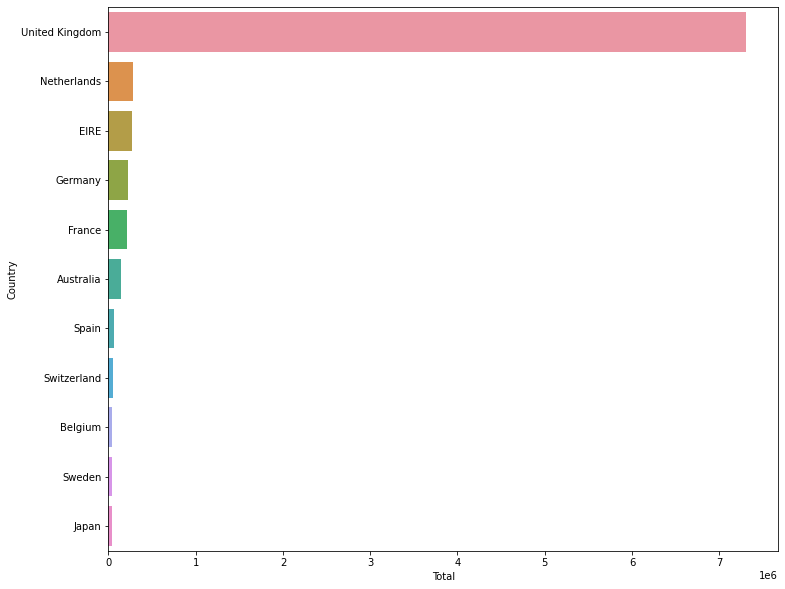

In [19]:
fig_revcountry, axrevcountry= plt.subplots(figsize=(12,10))
rev_country_plot = sns.barplot(data=most_rev_country.iloc[:11] , y='Country', x='Total', ax=axrevcountry)
# fig_c = country_plot.get_figure()
# rev_country_plot.get_figure().savefig("RevByCountry.jpg")

## Determinar periodo de Adquisición  y periodo de facturación (Determine Acquisition period and Billing period)

* En este caso, crearemos periodos mensuales, tomando como periodo inicial la fecha de la primera compra por cada cliente

* In this case, we will create monthly periods, taking as initial period the date of the first purchase for each customer.

In [20]:
valid_inv = valid_inv.assign(adq_cohort = valid_inv.groupby('CustomerID')\
                   ['InvoiceDate'].transform('min').dt.to_period('M'))
valid_inv = valid_inv.assign(Invoice_cohort= valid_inv['InvoiceDate'].dt.to_period('M'))
valid_inv

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,adq_cohort,Invoice_cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.2,2011-08,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France,12.6,2011-08,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-08,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6,2011-08,2011-12


## Analisis de Cohorte ##
* Estudiar el comportamiento de clientes agrupados por periodo de compra durante el lapso de tiempo transcurrido
####  * Analisis de Cohortes Clientes 
#### * Tasa de Recompra por Cada Cohorte de Clientes
####  * Analisis de Cohorte Ordenes atendidas 
#### *  Frecuencia de Compra Estimada por Cliente
#### * Analisis de Cohorte Ingresos Generados
#### * Valor de la Orden Promedio Emitida 
#### * Valor estimado por Cliente 

## Cohort Analysis
* To study the behavior of customers grouped by purchase period during the elapsed time period.
#### * Customer Cohort Analysis
#### * Repurchase Rate for Each Customer Cohort
#### *Cohort Analysis Orders Fulfilled¶ 
#### * Estimated Purchase Frequency per Customer Cohort
#### * Estimated Purchase Frequency per Customer
#### * Cohort Analysis Revenue Generated
#### * Average Order Value Issued
#### * Estimated Value per Customer


In [21]:
cohort = valid_inv.groupby(['adq_cohort','Invoice_cohort']).agg(customers=('CustomerID', 'nunique'), income=('Total', 'sum'), orders=('InvoiceNo', 'nunique')).reset_index(drop=False)
cohort['Periods'] = (cohort.Invoice_cohort - cohort.adq_cohort).apply(op.attrgetter('n'))
cohort

,adq_cohort,Invoice_cohort,customers,income,orders,Periods
0,2010-12,2010-12,885,572713.89,1400,0
1,2010-12,2011-01,324,276237.69,517,1
2,2010-12,2011-02,286,233845.37,458,2
3,2010-12,2011-03,340,303119.39,582,3
4,2010-12,2011-04,321,204407.66,504,4
...,...,...,...,...,...,...
86,2011-10,2011-11,86,40026.68,134,1
87,2011-10,2011-12,41,12621.1,50,2
88,2011-11,2011-11,323,136592.12,397,0
89,2011-11,2011-12,36,15284.61,42,1


## Tasa de Recompra
* Porcentaje de Usuarios de diferente cohorte que compraron en los siguientes periodos luego del registro.

## Repurchase Rate 
* Percentage of users from different cohorts who purchased in the following periods after registration.


In [22]:
# Numero de Clientes Adquiridos (Periodo 0) por meses y Clientes que recompraron en meses subsecuentes 
retention_c = cohort.pivot_table(index = 'adq_cohort',columns = 'Periods', values = 'customers')
retention_c

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12
adq_cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* La columna 0 en Periods (Periodos) indica que esa fue la primera vez que el cliente realizó una compra. en el primer dato observamos que 885 clientes compraron por primera vez en el periodo 2010-12 (Diciembre 2010), el segundo dato en esa misma columna (417) indica que se adquirieron 417 nuevos clientes en el siguiente mes, y asi sucesivamente. 
* Las columnas de los demas periodos (1-12) indica cuantos clientes de esos cohortes volvieron a adquirir productos en meses posteriores. 


* The 0 column in Periods indicates that this was the first time the customer made a purchase. In the first data we observe that 885 customers purchased for the first time in the period 2010-12 (December 2010), the second data in that same column (417) indicates that 417 new customers were acquired in the following month, and so on. 
* The columns for the other periods (1-12) indicate how many customers from those cohorts purchased products again in subsequent months. 

In [23]:
repurchase_rate = retention_c.divide(retention_c.iloc[:,0], axis=0)
repurchase_rate['Promedio'] = repurchase_rate.iloc[:,1:].mean(axis=1)
repurchase_rate

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,Promedio
adq_cohort,,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537,0.369774
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN,0.265751
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN,0.232895
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN,0.206244
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN,0.200000
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN,0.190644
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN,0.209366
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198936
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205621


* Para la primera fila observamos que en el mes siguiente 324 clientes volvieron a comprar luego de haber comprado por primera vez en el periodo 2010-12, lo cual equivale a una tasa del 37% de recompra por parte de esos clientes. Mientras mayor porcentaje de clientes vuelvan a adquirir tus productos mayor es del grado de aceptación que presentan ante los clientes.


* For the first row we observed that in the following month 324 customers returned to purchase after having bought for the first time in the period 2010-12, which is equivalent to a 37% rate of repurchase by those customers. The higher the percentage of customers who repurchase your products, the higher the degree of customer acceptance.

In [24]:
# Promedio de cada cohorte en % de la tasa de recompra.
repurchase_rate.iloc[:,1:].mean(axis=1)

adq_cohort
2010-12    0.369774
2011-01    0.265751
2011-02    0.232895
2011-03    0.206244
2011-04    0.200000
2011-05    0.190644
2011-06    0.209366
2011-07    0.198936
2011-08    0.205621
2011-09    0.216276
2011-10    0.177374
2011-11    0.111455
2011-12         NaN
Freq: M, dtype: float64

* Al calcular el promedio por cada cohorte se observa que los clientes mas antiguos presentan la tasa de recompra mas alta. esto tambien se debe a que presentan mayor cantidad de datos observables debido a su antiguedad como clientes recurrentes.


* When calculating the average for each cohort, it is observed that the oldest clients have the highest repurchase rate. This is also due to the fact that they have a greater amount of observable data due to their length of service as recurring clients.

In [25]:
repurchase_rate.iloc[:,1:].mean(axis=1).mean()

0.2153614376402838

## tasa Global de Recompra ( Overall Repurchase Rate) 
* Para el calculo del promedio y la tasa global de recompra (Repurchase rate) se tomaron los datos a partir del periodo 1 para cada cohorte de clientes.
* En conjunto durante el lapso 2010-2011 se cuenta con una tasa de recompra Aprox. del 21% 
* Separadas por Cohortes observamos que el primer cohorte (2010-12) tiene una tasa de recompra de 37% siendo el maximo entre todos los cohortes de usuarios, mientras que la tasa de recompra del ultimo cohorte de registrados (2011-11) es del 11% nada mas. nos muestra que los cohortes mas antiguos son mas propensos a realizar compras recurrentes


* For the calculation of the average and overall repurchase rate, data was taken from period 1 for each cohort of clients.
* The overall repurchase rate for the 2010-2011 period is approximately 21%. 
* Separated by cohorts we observe that the first cohort (2010-12) has a repurchase rate of 37% being the maximum among all cohorts of users, while the repurchase rate of the last cohort of registrants (2011-11) is 11% only, showing that the older cohorts are more likely to make recurring purchases.

In [26]:
# Nuevos clientes adquiridos por meses (New clients by months)
retention_c[0]

adq_cohort
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

### Cuadro Resumen de Clientes  (Customer Summary Table)

In [27]:
Users_dist = cohort.pivot_table(index = 'Invoice_cohort', values ='customers', aggfunc='sum')
Users_dist['new_customers'] = retention_c.iloc[:,0]
Users_dist['recurring_customers'] = (Users_dist.customers - Users_dist.new_customers)
Users_dist.T

Invoice_cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
customers,885.0,741.0,758.0,974.0,856.0,1056.0,991.0,949.0,935.0,1266.0,1364.0,1664.0,615.0
new_customers,885.0,417.0,380.0,452.0,300.0,284.0,242.0,188.0,169.0,299.0,358.0,323.0,41.0
recurring_customers,0.0,324.0,378.0,522.0,556.0,772.0,749.0,761.0,766.0,967.0,1006.0,1341.0,574.0


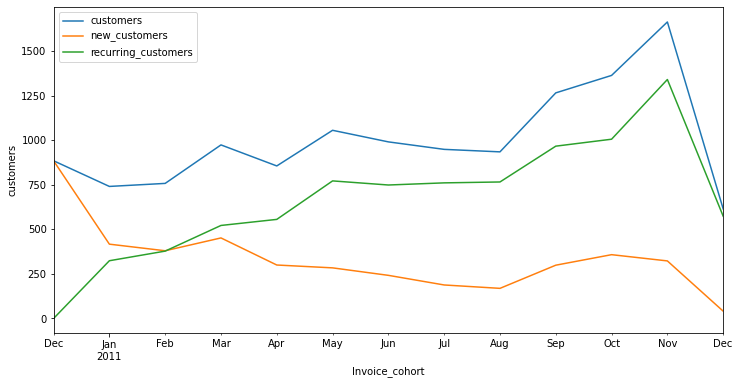

In [28]:
fig1, ax1 = plt.subplots(figsize=(12, 6), frameon=True)
axlinecan = Users_dist.plot(kind='line', ylabel='customers', ax=ax1)
# plt.savefig('CustomerSummaryTable.jpg', \
#             format='jpg', bbox_inches='tight')
plt.show()

## Comentarios (Comments)

* La cantidad de clientes por mes se mantiene en crecimiento hasta el mes de noviembre 2011 logrando un tope de 1664 clientes atendidos en ese mes.
* La mayoria de los clientes atendidos son clientes que compraron en meses anteriores, es decir, los clientes recurrentes son la principal fuente de ingresos de la tienda. Esto habla de la lealtad que muestran los clientes.
* En contraste, vemos como durante el pasar del tiempo, la tienda no fue capaz de mantener un ritmo de adquisicion de nuevos clientes 


* The number of customers per month continues to grow until November 2011, reaching a peak of 1664 customers served in that month.
* Most of the customers served are customers who purchased in previous months, i.e., recurring customers are the main source of revenue for the store. This speaks to the loyalty shown by customers.
* In contrast, we see how over time, the store was not able to maintain a rhythm of acquiring new customers. 

## Análisis por Cohorte Ordenes realizadas (Analysis by Cohort Orders placed)

* La siguiente matriz esta conformada por el numero de ordenes realizada de acuerdo al periodo en que se registro por primera vez el cliente. Es un cuadro similar al anterior presentado para ver la retención de los usuarios y evaluar cuantos de ellos repitieron compra en los periodos subsecuentes. En este caso, evaluamos las ordenes subsecuentes. 
* Adicionalmente, creamos una columna totalizando el numero de orden realizadas por los usuarios registrados en cada cohorte correspondiente. En conjunto con una columna que mostrara el valor esperado en el tiempo por cada grupo de clientes (CLV)
* La columna CLV indica que cada cliente en el caso del adq_cohort 2010-12 ha realizado casi 10 ordenes en promedio desde que conocio el sitio web.

* The following table is made up of the number of orders placed according to the period in which the customer registered for the first time. It is similar to the previous table presented to see the retention of users. In this case, we evaluate subsequent orders. 
* We created a column totaling the number of orders placed by registered users in each corresponding cohort.
* The CLV column indicates that each customer in the case of adq_cohort 2010–12 has placed almost 10 orders on average since they became aware of the website. This also means a customer from the period 2010–12 creates 5 times more value than a customer from the next period (2011–12)


In [29]:
orders_cohort = cohort.pivot_table(index = 'adq_cohort',columns = 'Periods', values = 'orders')
orders_cohort['total_orders'] = orders_cohort.sum(axis=1)
orders_cohort['CLV'] = orders_cohort['total_orders'].divide(retention_c.iloc[:,0], axis=0)
orders_cohort

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,total_orders,CLV
adq_cohort,,,,,,,,,,,,,,,
2010-12,1400.0,517.0,458.0,582.0,504.0,651.0,572.0,547.0,538.0,641.0,628.0,945.0,335.0,8318.0,9.398870
2011-01,470.0,117.0,149.0,125.0,186.0,161.0,145.0,135.0,163.0,191.0,246.0,65.0,NaN,2153.0,5.163070
2011-02,422.0,90.0,94.0,147.0,124.0,118.0,110.0,140.0,120.0,166.0,30.0,NaN,NaN,1561.0,4.107895
2011-03,500.0,87.0,153.0,123.0,123.0,99.0,145.0,140.0,194.0,47.0,NaN,NaN,NaN,1611.0,3.564159
2011-04,339.0,90.0,72.0,72.0,69.0,76.0,75.0,104.0,27.0,NaN,NaN,NaN,NaN,924.0,3.080000
2011-05,328.0,71.0,60.0,64.0,82.0,80.0,104.0,30.0,NaN,NaN,NaN,NaN,NaN,819.0,2.883803
2011-06,270.0,53.0,45.0,79.0,70.0,117.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,661.0,2.731405
2011-07,213.0,38.0,51.0,48.0,70.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.0,2.351064
2011-08,182.0,42.0,59.0,53.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.0,2.118343


In [30]:
Customer_orders = cohort.pivot_table(index = 'Invoice_cohort', values ='orders', aggfunc='sum')
Customer_orders['new_customers_orders'] = orders_cohort.iloc[:,0]
Customer_orders['recurring_customers_orders'] = (Customer_orders.orders - Customer_orders.new_customers_orders)
# Customer_orders

### Cuadro Resumen Ordenes (Orders Summary Table)

In [31]:
Customer_orders.swapaxes("index", "columns")

Invoice_cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
orders,1400.0,987.0,997.0,1321.0,1149.0,1555.0,1393.0,1331.0,1280.0,1755.0,1929.0,2657.0,778.0
new_customers_orders,1400.0,470.0,422.0,500.0,339.0,328.0,270.0,213.0,182.0,336.0,424.0,397.0,43.0
recurring_customers_orders,0.0,517.0,575.0,821.0,810.0,1227.0,1123.0,1118.0,1098.0,1419.0,1505.0,2260.0,735.0


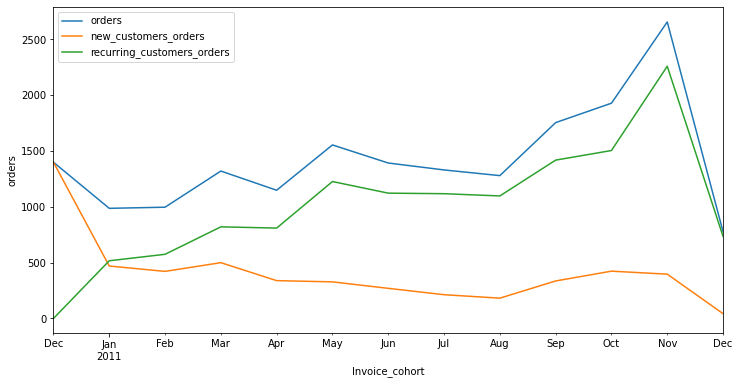

In [32]:
fig2, ax2 = plt.subplots(figsize=(12, 6), frameon=True)
axlinecustomers = Customer_orders.plot(kind='line', ylabel='orders', ax=ax2)
# plt.savefig('ordersTable.jpg', \
#             format='jpg', bbox_inches='tight')
plt.show()

## Comentarios (Comments)
* La cantidad de ordenes por mes se mantiene en crecimiento hasta el mes de noviembre 2011 logrando un tope de 2657 ordenes atendidas en ese mes, en total concordancia con la tendencia observada en el grafico de clientes.
* La mayoria de las ordenes emitidas son clientes que compraron en meses anteriores, es decir, los clientes recurrentes son los que mas ordenes generaron durante el año.
* De igual forma que en el grafico de clientes, la tendencia es que las ordenes emitidas por clientes nuevos se vienen reduciendo durante todo el lapso de tiempo estudiado.


* The number of orders per month continues to grow until November 2011, reaching a peak of 2,657 orders handled in that month, in total agreement with the trend observed in the customer graph.
* Most of the orders issued are customers who purchased in previous months, i.e., recurring customers are those who generated more orders during the year.
* As in the customer graph, the trend is that orders issued by new customers have been decreasing throughout the time period studied.

##  Frecuencia de Compra (Purchase Frequency) 
* Se toman el total de ordenes emitidas por cada periodo dividido entre el total de clientes atendidos en cada periodo.


* Total orders issued for each period divided by the total number of customers served in each period.

In [33]:
#  Total Orders / Total Customers
Pfrecuency= orders_cohort.iloc[:,:-2].divide(retention_c)
Pfrecuency['Promedio'] = Pfrecuency.mean(axis=1)
Pfrecuency

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,Promedio
adq_cohort,,,,,,,,,,,,,,
2010-12,1.581921,1.595679,1.601399,1.711765,1.570093,1.849432,1.781931,1.770227,1.718850,1.831429,1.897281,2.123596,1.425532,1.727626
2011-01,1.127098,1.271739,1.342342,1.302083,1.388060,1.341667,1.407767,1.336634,1.304000,1.404412,1.618421,1.326531,NaN,1.347563
2011-02,1.110526,1.267606,1.323944,1.361111,1.203883,1.255319,1.145833,1.320755,1.276596,1.431034,1.153846,NaN,NaN,1.259132
2011-03,1.106195,1.279412,1.342105,1.366667,1.217822,1.302632,1.198347,1.346154,1.539683,1.205128,NaN,NaN,NaN,1.290414
2011-04,1.130000,1.406250,1.180328,1.142857,1.169492,1.117647,1.153846,1.333333,1.227273,NaN,NaN,NaN,NaN,1.206781
2011-05,1.154930,1.314815,1.224490,1.306122,1.389831,1.212121,1.386667,1.111111,NaN,NaN,NaN,NaN,NaN,1.262511
2011-06,1.115702,1.261905,1.184211,1.234375,1.250000,1.444444,1.173913,NaN,NaN,NaN,NaN,NaN,NaN,1.237793
2011-07,1.132979,1.117647,1.307692,1.142857,1.372549,1.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.186891
2011-08,1.076923,1.200000,1.404762,1.292683,1.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204397


* Valores por encima de 2 indica que la proporción de ordenes por clientes es positiva. cada cliente estaria generando mas de una orden por mes en promedio. 
* Se observa que para el primer cohorte por cada cliente que se atendio se emitieron casi 2 ordenes en promedio. Se observa que en noviembre el valor de las ordenes por clientes supero el promedio (Periods 11 por ejemplo). Solo los clientes de ese cohorte han logrado superar el valor promedio de 2 ordenes.
* En general los promedios de ordenes por clientes van descendiendo mientras los cohortes son los mas recientes 


* Values above 2 indicate that the ratio of orders per client is positive. Each client would be generating more than one order per month on average. 
* It is observed that for the first cohort, for each client served, almost 2 orders were issued on average. It is observed that in November the value of orders per client exceeded the average (Periods 11 for example). Only clients in that cohort have managed to exceed the average value of 2 orders.
* In general, the average number of orders per client is decreasing as the cohorts are the most recent. 

## Análisis por Cohorte de Ingresos Generados (Analysis by Cohort of Income Generated)

In [34]:
revenue_cohort = cohort.pivot_table(index = 'adq_cohort',columns = 'Periods', values = 'income')
revenue_cohort['TotalRevenue'] = revenue_cohort.sum(axis=1)
revenue_cohort['ExpectedCustRev'] = revenue_cohort['TotalRevenue'].div(retention_c[0])
revenue_cohort


Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,TotalRevenue,ExpectedCustRev
adq_cohort,,,,,,,,,,,,,,,
2010-12,572713.89,276237.69,233845.37,303119.39,204407.66,336627.5,314162.61,310783.92,331749.22,472813.64,456080.61,513803.59,185803.13,4512148.220,5098.472565
2011-01,293207.35,55149.91,63268.17,71587.4,81114.09,84583.78,70107.4,72689.71,72023.651,111803.9,123882.1,26464.82,<NA>,1125882.281,2699.957508
2011-02,158142.07,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.06,64809.45,10600.22,<NA>,<NA>,593876.880,1562.833895
2011-03,200069.96,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.83,12868.02,<NA>,<NA>,<NA>,643758.940,1424.245442
2011-04,122011.491,29452.82,25077.07,24311.47,26314.19,30206.3,28668.98,34228.61,6350.1,<NA>,<NA>,<NA>,<NA>,326621.031,1088.736770
2011-05,124103.78,18682.76,20193.76,19162.17,27861.87,32976.6,33312.91,179251.53,<NA>,<NA>,<NA>,<NA>,<NA>,455545.380,1604.033028
2011-06,135742.95,14805.15,14155.4,30961.59,26754.54,42808.25,8227.35,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,273455.230,1129.980289
2011-07,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,144468.341,768.448622
2011-08,79756.1,20962.93,35503.9,44541.76,15284.36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,196049.050,1160.053550


## Comentarios (Comments)
* La matriz del dataframe indica los ingresos generados por los diferentes cohortes de clientes durante los periodos transcurridos desde Diciembre 2010 a Diciembre 2011. 
* La columna TotalRevenue indica el acumulado de ingresos asociados a cada cohorte de clientes, se observa que aquellos clientes perteneciente a los cohortes mas antiguos fueron los que generaron mayores ingresos durante el año.
* La columna ExpectedCustRev indica el valor de ingresos estimado que ha traido cada usuario en promedio de cada cohorte, en la primera fila vemos que son los clientes registrados en Diciembre 2010, el primer dato indica que fueron 885 clientes registrados. si se divide la columna totalRevenue entre el numero de clientes primerizos de cada cohorte observamos el Valor estimado que cada cliente de ese cohorte tiene para los ingresos facturados.
* El valor promedio estimado por cada cliente del primer cohorte es de aprox. 5098 £ 
 
 
 
* The dataframe matrix indicates the revenues generated by the different cohorts of clients during the period from December 2010 to December 2011.
* The TotalRevenue column indicates the cumulative revenue associated with each client cohort, it can be seen that those clients belonging to the oldest cohorts generated the most revenue during the year.
* The ExpectedCustRev column indicates the estimated revenue value that each user has brought on average from each cohort, in the first row we see that these are the clients registered in December 2010, the first data indicates that there were 885 registered clients. If we divide the totalRevenue column by the number of first time clients from each cohort we observe the estimated value that each client from that cohort has for the billed revenue.
* The estimated average value for each client in the first cohort is approx. 5098 £.

## Crecimiento del Valor Esperado por Cliente (Expected Value per Customer Growth)

In [35]:
# Ingresos Generado por cohorte entre el total de clientes por cada Cohorte
growth_cohort = cohort.pivot_table(index = 'adq_cohort',columns = 'Periods', values = 'income')
growth_cohort= growth_cohort.cumsum(axis=1,skipna=False)
growth_cohort= growth_cohort.divide(retention_c[0], axis=0)
# growth_cohort['Promedio']= growth_cohort.mean(axis=1)
growth_cohort.style.format('{:.2f}')

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12,647.13,959.27,1223.50,1566.01,1796.98,2177.35,2532.33,2883.50,3258.36,3792.61,4307.96,4888.53,5098.47
2011-01,703.14,835.39,987.11,1158.78,1353.30,1556.14,1724.26,1898.58,2071.30,2339.41,2636.49,2699.96,
2011-02,416.16,492.59,600.84,727.79,833.44,923.50,1054.31,1218.65,1364.39,1534.94,1562.83,,
2011-03,442.63,509.14,639.79,734.52,848.81,937.35,1080.98,1238.11,1395.78,1424.25,,,
2011-04,406.70,504.88,588.47,669.51,757.22,857.91,953.47,1067.57,1088.74,,,,
2011-05,436.99,502.77,573.87,641.35,739.45,855.57,972.87,1604.03,,,,,
2011-06,560.92,622.10,680.59,808.53,919.09,1095.98,1129.98,,,,,,
2011-07,393.66,456.37,539.00,632.36,736.15,768.45,,,,,,,
2011-08,471.93,595.97,806.05,1069.61,1160.05,,,,,,,,
2011-09,518.74,615.24,739.10,780.26,,,,,,,,,


In [36]:
growth_percentage = growth_cohort.divide(growth_cohort[0], axis=0)-1
growth_percentage.style.format('{:.2f}')

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12
2010-12,0.00,0.48,0.89,1.42,1.78,2.36,2.91,3.46,4.04,4.86,5.66,6.55,6.88
2011-01,0.00,0.19,0.40,0.65,0.92,1.21,1.45,1.70,1.95,2.33,2.75,2.84,
2011-02,0.00,0.18,0.44,0.75,1.00,1.22,1.53,1.93,2.28,2.69,2.76,,
2011-03,0.00,0.15,0.45,0.66,0.92,1.12,1.44,1.80,2.15,2.22,,,
2011-04,0.00,0.24,0.45,0.65,0.86,1.11,1.34,1.62,1.68,,,,
2011-05,0.00,0.15,0.31,0.47,0.69,0.96,1.23,2.67,,,,,
2011-06,0.00,0.11,0.21,0.44,0.64,0.95,1.01,,,,,,
2011-07,0.00,0.16,0.37,0.61,0.87,0.95,,,,,,,
2011-08,0.00,0.26,0.71,1.27,1.46,,,,,,,,
2011-09,0.00,0.19,0.42,0.50,,,,,,,,,


* El primer cohorte muestra que el valor estimado por clientes logro llegar hasta 6.87 veces por cada cliente pertenenciente a ese periodo. Esto quiere decir que cada cliente de este grupo tiene un valor 6 veces mas alto en promedio que un cliente que no frecuenta la tienda. Se podria tomar este valor como un indicador de la fidelidad de compra presentada por estos clientes.
* La diferencia entre el primer cohorte y los demas es considerable, del cohorte 2 al 5 apenas han logrado superar el 2x.



* The first cohort shows that the estimated value per customer reached 6.87 times for each customer belonging to that period. This means that each customer in this group has a value 6 times higher on average than a customer who does not frequent the store. This value could be taken as an indicator of the purchase loyalty of these customers.
* The difference between the first cohort and the others is considerable, cohort 2 to 5 have barely managed to exceed 2x.

## Porcentaje de Ingresos en comparación con el periodo inicial (Percentage of revenue compared to initial period)

In [37]:
net_dolarvalue = revenue_cohort.iloc[:,:-2].divide(revenue_cohort.iloc[:,0], axis=0)
net_dolarvalue.style.format('{:.2f}')

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12
adq_cohort,,,,,,,,,,,,,
2010-12,1.00,0.48,0.41,0.53,0.36,0.59,0.55,0.54,0.58,0.83,0.80,0.90,0.32
2011-01,1.00,0.19,0.22,0.24,0.28,0.29,0.24,0.25,0.25,0.38,0.42,0.09,
2011-02,1.00,0.18,0.26,0.31,0.25,0.22,0.31,0.39,0.35,0.41,0.07,,
2011-03,1.00,0.15,0.30,0.21,0.26,0.20,0.32,0.35,0.36,0.06,,,
2011-04,1.00,0.24,0.21,0.20,0.22,0.25,0.23,0.28,0.05,,,,
2011-05,1.00,0.15,0.16,0.15,0.22,0.27,0.27,1.44,,,,,
2011-06,1.00,0.11,0.10,0.23,0.20,0.32,0.06,,,,,,
2011-07,1.00,0.16,0.21,0.24,0.26,0.08,,,,,,,
2011-08,1.00,0.26,0.45,0.56,0.19,,,,,,,,


* Con el indicador net_dolarvalue tratamos de evaluar si en algun mes de compra subsequente se logro sobrepasar el monto facturado inicialmente. esto seria una señal positiva pues significaria que el mismo grupo de clientes compro incluso una mayor cifra de dinero en algun periodo siguiente.


* With the net_dolarvalue indicator we try to evaluate whether in any subsequent month of purchase the amount initially invoiced was exceeded. This would be a positive sign because it would mean that the same group of customers bought even more money in some following period.

### Net_dolar_value = Conocer si existe Ingresos por expansión, grupos de clientes genero mayor nivel de ingreso en algun periodo subsecuente comparado con el periodo inicial

## Ingreso Promedio Generado por Ordenes (Average Order value)

In [38]:
# Ingreso Promedio generado por Ordenes en cada periodo (Average Order Value = Total Sales / Order Count)
PromRev = revenue_cohort.iloc[:,:-2].divide(orders_cohort.iloc[:,:-2], axis=1)
PromRev['Promedio'] = PromRev.mean(axis=1)
PromRev.style.format('{:.2f}')

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,Promedio
adq_cohort,,,,,,,,,,,,,,
2010-12,409.08,534.31,510.58,520.82,405.57,517.09,549.24,568.16,616.63,737.62,726.24,543.71,554.64,553.36
2011-01,623.85,471.37,424.62,572.70,436.10,525.37,483.50,538.44,441.86,585.36,503.59,407.15,,501.16
2011-02,374.74,322.70,437.60,328.16,323.77,290.03,451.88,446.08,461.50,390.42,353.34,,,380.02
2011-03,400.14,345.51,386.00,348.10,419.98,404.25,447.72,507.31,367.35,273.79,,,,390.02
2011-04,359.92,327.25,348.29,337.66,381.37,397.45,382.25,329.12,235.19,,,,,344.28
2011-05,378.37,263.14,336.56,299.41,339.78,412.21,320.32,5975.05,,,,,,1040.60
2011-06,502.75,279.34,314.56,391.92,382.21,365.88,304.72,,,,,,,363.05
2011-07,347.46,310.25,304.59,365.66,278.74,276.01,,,,,,,,313.79
2011-08,438.22,499.12,601.76,840.41,694.74,,,,,,,,,614.85


* El valor para order promedio mas elevado corresponde en global al cohorte de clientes Mayo 2011 (2011-05). El monto promedio de facturación es superior a las 1000 libras. 
* En 2do Lugar se encuentra el cohorte de clientes de Agosto 2011 (2011-08) con un promedio de facturación de 614 libras aprox. Para este dato podemos destacar que durante los ultimos 3 meses ha presentado una facturación promedio por encima de las 600 libras.
* Luego, tenemos el cohorte 2011-12 con 629 libras. Vale destacar que solo tiene un mes de registro 


* The highest average order value corresponds to the overall May 2011 (2011-05) client cohort. The average billing amount is over 1000 pounds. 
* In 2nd place is the customer cohort August 2011 (2011-08) with an average turnover of 614 pounds approx. For this data we can highlight that during the last 3 months has presented an average turnover above 600 pounds.
* Then, we have the 2011-12 cohort with 629 pounds. It is worth noting that it has only one month of registration 

## Valor Estimado por Cliente

In [39]:
# Customer Value = Average Order Value x Purchase Frequency
CustValue= Pfrecuency.mul(PromRev)
CustValue.style.format('{:.2f}')

Periods,0,1,2,3,4,5,6,7,8,9,10,11,12,Promedio
adq_cohort,,,,,,,,,,,,,,
2010-12,647.13,852.59,817.64,891.53,636.78,956.33,978.70,1005.77,1059.90,1350.90,1377.89,1154.61,790.65,956.00
2011-01,703.14,599.46,569.98,745.70,605.33,704.86,680.65,719.70,576.19,822.09,815.01,540.10,,675.34
2011-02,416.16,409.06,579.36,446.66,389.79,364.08,517.78,589.16,589.15,558.70,407.70,,,478.50
2011-03,442.63,442.05,518.05,475.74,511.46,526.59,536.52,682.92,565.60,329.95,,,,503.28
2011-04,406.70,460.20,411.10,385.90,446.00,444.21,441.06,438.83,288.64,,,,,415.47
2011-05,436.99,345.98,412.12,391.06,472.24,499.65,444.17,6638.95,,,,,,1313.77
2011-06,560.92,352.50,372.51,483.77,477.76,528.50,357.71,,,,,,,449.39
2011-07,393.66,346.76,398.31,417.89,382.59,289.15,,,,,,,,372.43
2011-08,471.93,598.94,845.33,1086.38,727.83,,,,,,,,,740.52


### El Valor estimado por cliente es un dato clave para construir un modelo financiero proyectado

In [40]:
CustValue['Promedio'].describe()

count      13.000000
mean      603.450376
std       272.004456
min       372.428944
25%       424.039130
50%       478.495221
75%       675.341697
max      1313.773133
Name: Promedio, dtype: float64

<AxesSubplot:xlabel='Promedio', ylabel='Density'>

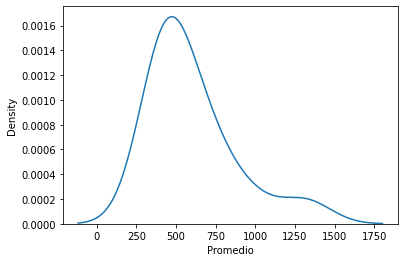

In [41]:
sns.kdeplot(data=CustValue, x="Promedio")

* presenta asimetria positiva, por tanto hay mas valores presentes hacia el lado derecho de la curva, lo que indica que de los promedios para el valor estimado de cada cliente la mayoria se encuentran por encima de la media (600 libras esterlinas) en valor 


* shows positive skewness, so there are more values present towards the right side of the curve, indicating that of the averages for each customer's estimated value, most are above the mean (£600) in value. 

### Cuadro Resumen de ingresos (Revenue Summary Table)

In [42]:
revenuebycohort = cohort.pivot_table(index = 'Invoice_cohort', values ='income', aggfunc='sum')
revenuebycohort['new_cust_rev'] = revenue_cohort.iloc[:,0]
revenuebycohort['rec_cust_rev'] = (revenuebycohort.income - revenuebycohort.new_cust_rev)
revenuebycohort

,income,new_cust_rev,rec_cust_rev
Invoice_cohort,,,
2010-12,572713.89,572713.89,0.0
2011-01,569445.04,293207.35,276237.69
2011-02,447137.35,158142.07,288995.28
2011-03,595500.76,200069.96,395430.8
2011-04,469200.361,122011.491,347188.87
2011-05,678594.56,124103.78,554490.78
2011-06,661213.69,135742.95,525470.74
2011-07,600091.011,74008.751,526082.26
2011-08,645343.9,79756.1,565587.8


In [43]:
revenuebycohort.swapaxes("index", "columns")

Invoice_cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
income,572713.89,569445.04,447137.35,595500.76,469200.361,678594.56,661213.69,600091.011,645343.9,952838.382,1039318.79,1161817.38,518192.79
new_cust_rev,572713.89,293207.35,158142.07,200069.96,122011.491,124103.78,135742.95,74008.751,79756.1,155103.901,174721.76,136592.12,27059.46
rec_cust_rev,0.0,276237.69,288995.28,395430.8,347188.87,554490.78,525470.74,526082.26,565587.8,797734.481,864597.03,1025225.26,491133.33


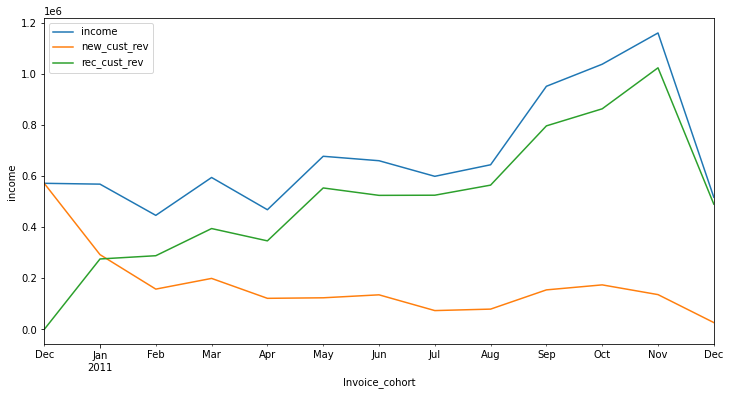

In [44]:
fig3, ax3 = plt.subplots(figsize=(12, 6), frameon=True)
axlinerev = revenuebycohort.plot(kind='line', ylabel='income', ax=ax3)
# plt.savefig('RevenuesTable.jpg', \
#             format='jpg', bbox_inches='tight')
plt.show()

## Conclusión (Conclusion)
* Al analizar los cohortes de clientes, ordenes emitidas e ingresos se observa que la mayoria del desarrollo de negocio en este lapso se debe a la fidelidad y compras recurrentes de los clientes pertenecientes a los cohortes de adquisición mas antiguos. 
* Los clientes del primer cohorte presenta mayor frecuencia de compras por mes y promedio de compras en libras mas elevado que los demas, junto a mayor tasa promedio de recompra.
* Es valido señalar este nivel de fidelidad logrado con los primeros clientes podria tratar de utilizarse en beneficio de la captación de nuevos clientes a través de algun programa de afiliación. 
* Como aspecto negativo, el website no ha sido capaz de mantener el ritmo de adquisicion de nuevos clientes, lo cual puede ser un sintoma del posible desgaste del mensaje que se publica para atraer a posibles nuevos clientes.
* En general se podria decir que el nivel de fidelidad logrado con los clientes es aceptable por la consistencia de ingresos que puede generar, mientras que la adquisición de nuevos clientes no ha sido eficiente.





* Most of the business development in this period is due to the loyalty and recurring purchases of customers belonging to the oldest acquisition cohorts.
* The main aspects evaluated show that revenues, customers, and orders belong mostly to the oldest registered customers.
* The business has acceptable traction, with approximately 1 out of every 5 customers purchasing recurrently on the platform. The expected customer value has grown up to 2x in 4 of 12 cohorts. The average order value shows a good signal with an amount above £300.
* The only value that is not good enough is that they don't have a significant purchase frequency, nor have they doubled the amount of revenue generated with respect to their initial month.
* On the other hand, there is a deficiency in the generation of value from new customers. The trend shows that each month fewer customers are joining, placing fewer orders and therefore, less revenue comes from this group.

## Estrategias Recomendadas (Recommendations)

* La estrategia debe orientarse a captar más clientes nuevos. Por lo tanto, se puede realizar una segmentación de los clientes haciendo hincapié en las cohortes con mejores resultados del año.
* los clientes mas antiguos mustran cierta fidelidad con la tienda , por tanto se  podría tratar de utilizarse en beneficio de la captación de nuevos clientes a través de algún programa de afiliación.
* Intentar identificar el mismo tipo de cliente en otros países cercanos al Reino Unido, buscando aumentar las ventas procedentes de mercados extranjeros.
* Por ultimo, mejorar la frecuencia de compra mensual de los clientes. Manteniendo el valor medio de los pedidos y aumentando la frecuencia de las compras el valor por cliente puede variar favorablemente.



* The strategy must be oriented to attract more new customers. Therefore, customer segmentation can be performed with an emphasis on those cohorts with the best performance for the year.
* The older customers show a certain loyalty to the store, so it could be used to benefit the attraction of new customers through an affiliation program.
* Try to identify the same kind of client in other countries near the UK, looking for increased sales originating from foreign markets.
* At last, improve customer purchase frequency per month. By maintaining the average order value and increasing the frequency of purchases, the value per customer can grow.
